In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [2]:
import api_bolsa
ticker = api_bolsa.getTickerOf("GGAL.XBUE")
df = api_bolsa.getLastXEodsOf(30,"GGAL.XBUE")


<AxesSubplot:xlabel='Fecha'>

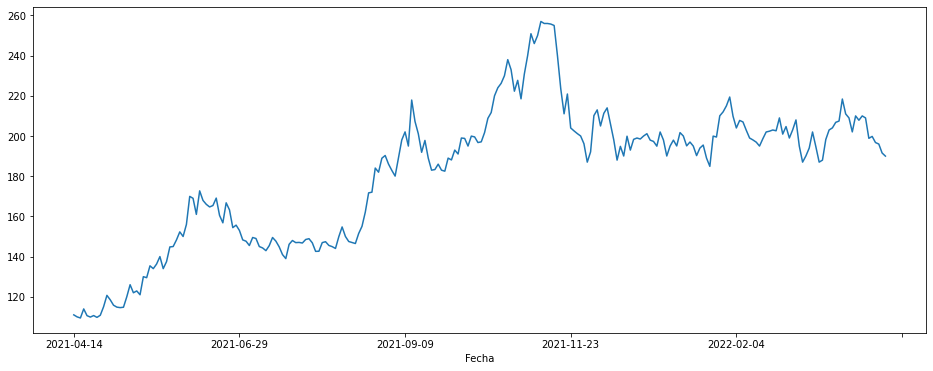

In [3]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df.index,open=df['Abrió'],high=df['Maximo'],low=df['Minimo'],close=df['Cerró'])])
fig.update_layout(xaxis_rangeslider_visible=False,xaxis=dict(type = "category"),title=ticker.name,yaxis_title="Price",width=1000)
fig.show()

df['Abrió'].plot(figsize=(16,6))

In [4]:
df.rolling(7).mean().head(20)

,Abrió,Cerró,Minimo,Maximo,Volumen
Fecha,,,,,
2021-04-14,NaN,NaN,NaN,NaN,NaN
2021-04-15,NaN,NaN,NaN,NaN,NaN
2021-04-16,NaN,NaN,NaN,NaN,NaN
2021-04-19,NaN,NaN,NaN,NaN,NaN
2021-04-20,NaN,NaN,NaN,NaN,NaN
2021-04-21,NaN,NaN,NaN,NaN,NaN
2021-04-22,110.792857,110.350000,109.214286,112.042857,1.160437e+06
2021-04-23,110.614286,110.250000,108.978571,111.621429,1.188392e+06
2021-04-26,110.728571,110.900000,109.150000,112.142857,1.189770e+06


<AxesSubplot:xlabel='Fecha'>

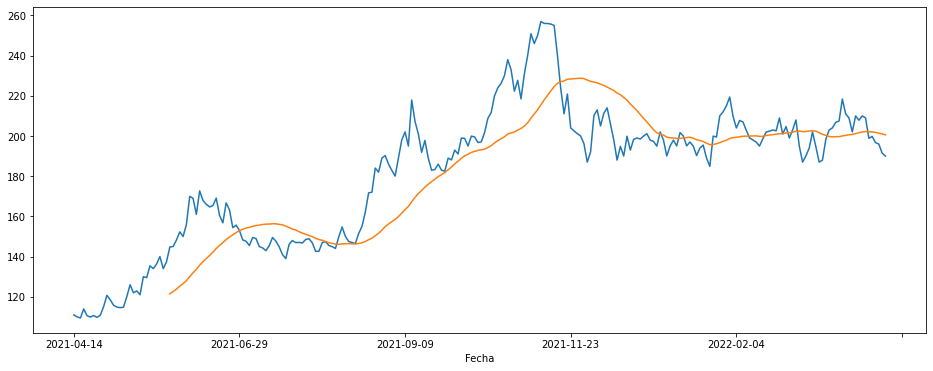

In [5]:
df["Abrió"].plot(figsize=(16,6))
df.rolling(window=30).mean()['Abrió'].plot()

In [6]:
# df["Cerró: MA30(Media Movil 30 d)"] = df["Cerró"].rolling(window=30).mean()
# df[["Cerró","Cerró: MA30(Media Movil 30 d)"]].plot(figsize=(16,6))

In [7]:
training_set=df["Abrió"]
training_set=pd.DataFrame(training_set)

In [8]:
df.isna().any()

Abrió      False
Cerró      False
Minimo     False
Maximo     False
Volumen    False
dtype: bool

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
x_train=[]
y_train=[]
for i in range(60,246):
    x_train.append(training_set_scaled[i-60,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train,ndmin = 2),np.array(y_train,ndmin = 2)

x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [11]:
#PART 2 BUILDING RED NEURONAL NETWORK
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [12]:
regressor=Sequential()

In [13]:
#Adding LSTM Layers
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [14]:
import tensorflow as tf

x_train = tf.stack(x_train)
y_train = tf.stack(y_train)

In [15]:
#Compiling RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
#Fitting the RNN to the training set
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.3518
Epoch 2/100
1/1 [==============================] - 0s 127ms/step - loss: 0.2967
Epoch 3/100
1/1 [==============================] - 0s 122ms/step - loss: 0.2523
Epoch 4/100
1/1 [==============================] - 0s 121ms/step - loss: 0.1778
Epoch 5/100
1/1 [==============================] - 0s 119ms/step - loss: 0.0652
Epoch 6/100
1/1 [==============================] - 0s 123ms/step - loss: 0.0693
Epoch 7/100
1/1 [==============================] - 0s 120ms/step - loss: 0.0653
Epoch 8/100
1/1 [==============================] - 0s 131ms/step - loss: 0.0381
Epoch 9/100
1/1 [==============================] - 0s 121ms/step - loss: 0.0405
Epoch 10/100
1/1 [==============================] - 0s 121ms/step - loss: 0.0551
Epoch 11/100
1/1 [==============================] - 0s 120ms/step - loss: 0.0362
Epoch 12/100
1/1 [==============================] - 0s 120ms/step - loss: 0.0303
Epoch 13/100
1/1 [======================

In [16]:
#Making the predictions
#Getting the real stock price
dataset_test=df
real_stock_price=dataset_test.iloc[:,1:2].values


In [17]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 2021-04-14 to 2022-04-13
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Abrió    246 non-null    float64
 1   Cerró    246 non-null    float64
 2   Minimo   246 non-null    float64
 3   Maximo   246 non-null    float64
 4   Volumen  246 non-null    float64
dtypes: float64(5)
memory usage: 11.5+ KB


In [18]:
test_set=dataset_test['Abrió']
test_set=pd.DataFrame(test_set)

In [19]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 2021-04-14 to 2022-04-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Abrió   246 non-null    float64
dtypes: float64(1)
memory usage: 3.8+ KB


In [32]:
import torch
dataset_total = pd.concat((df['Abrió'],dataset_test['Abrió']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:1,0])
x_test = np.array(x_test,ndmin=2)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

C:\Users\Nico\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

C:\Users\Nico\AppData\Local\Temp\ipykernel_8484\1200097216.py:9: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).